## 1. 今日の量子コンピュータの問題

- Noisy Intermediate-Scale Quantum (NISQ) デバイス
    - 量子回路が深くなる（ゲート数が多くなる）ほど、誤差が大きくなる
    - 十分な量子ビット数ではない
- 量子コンピュータは特別な量子ゲートしか用意されていない。量子デバイスごとに異なる  
  Quantinuum H-series: default: {Rz, PhasedX, ZZMax, ZZPhase}, option: {Rz, PhasedX, SU(4)},  
  IBM Quantum: Heron {CZ, ID, RX, RZ, RZZ, SX, X}, Eagle {ECR, ID, RZ, SX, X}  
- 量子コンピュータによっては特定の２量子ビット間のエンタングルゲートしか用意されていない  
  Quantinuumの量子コンピュータは全結合なので、任意の二つの量子ビットをエンタングルさせることが可能
- それぞれの量子コンピュータに対して、量子ソフトウェアツールキットが用意されてる


### 1-1. TKETとは
- Quantum Software Development Kit
- TKETに実装されている量子回路最適化はC++で実装。現在開発中のTKET2ではRustで実装。
- pythonモジュール　ユーザーはPythonパッケージ`pytket`で量子プログラミングの開発が可能
- 最適化コンパイラ：　ユーザーフレンドリーな回路→量子デバイスで実行可能な回路に変換可能
    - Language-agnostic (多くの量子プログラミングフレームワーク(qiskit, Cirq, etc)をサポート)
    - Retagetable (多くの量子デバイス(Quantinuum, IBM, Amazon Braket(IonQ, Rigetti, IQM), Microsoft Azure Quantum(Quantinuu,IonQ, Rigetti) etc)をサポート)
    - Circuit Optimisation (量子計算時に生じるデバイスエラーの影響を最小化。デバイス依存＆デバイス非依存のものが実装)
    
<img src="./fig/tket1_revised.png" width="750">



#### 参照
- [pytket ドキュメント](https://docs.quantinuum.com/tket/)
- [pytket ユーザーガイド](https://docs.quantinuum.com/tket/user-guide/)
- [t|ket⟩ : A Retargetable Compiler for NISQ Devices](https://arxiv.org/abs/2003.10611)
- [TKET slack channel](https://join.slack.com/t/tketusers/shared_invite/zt-2aoan2s87-WDdZQeY2dbJQgAQE6O~3qg)

<img src="./fig/slack-qr.png" width="250">


### 1-2. pytketと拡張 pytket (python パッケージ)
Python 3.10.11で動作確認をしています。

|  パッケージ |  概要  |
| :---- | :---- |
|  pytket  |  TKETを利用するためのpython モジュール  ( available for python3.10 or higher )|
|  pytket-quantinuum  |  Quantinuumデバイス、エミュレータを利用するためのpytket-extension  |
|  pytket-qiskit  |  qiskit、IMBQデバイスを利用するためのpytket-extension  |
|  pytket-braket  |  Amazon Braketを利用するためのpytket-extension  |
|  pytket-circ    |  Google circを利用するためのpytket-extension  |
|  pytket-qulacs  |  Qulacsシミュレータを利用するためのpytket-extension  |

<img src="./fig/tket2.png" width="850">

## 2. 量子回路を作成して、シュミレータや量子コンピュータにジョブを実行　（より詳しい内容は２日目に行います）
ここでは、量子デバイスやシュミレーションを利用するまでの一連の流れをと`TKET`で作成したBell状態の量子回路で見てみる。

pytket, pytket-extensionのインストール

In [ ]:
#!pip install -U pytket pytket-quantinuum pytket-quantinuum[pecos] pytket-qiskit

### 2-1 `TKET`でBell状態を作成
$$ |\Psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$$

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

bell = Circuit(2)
bell.H(0).CX(0,1)
bell.measure_all()
render_circuit_jupyter(bell)

Note：TKETの可視化では、可視化した量子回路の画像ファイルを出力できる。

In [2]:
#bell.to_latex_file('bell.tex')

### 2-2. `pytket-quantinuum`でTKET 量子回路をQuantinuum エミュレータで計算

#### 利用できるQuantinuum エミュレータを確認

In [4]:
from pytket.extensions.quantinuum import QuantinuumBackend
backendlist= [b.device_name for b in QuantinuumBackend.available_devices()]
backendlist

['H1-1', 'H1-1LE', 'H2-1', 'H2-1LE', 'H2-2', 'H2-2LE']

#### a. エミュレータまたはQuantinuum 量子コンピュータを選択  
Quantinuum 量子コンピュータへのアクセスはマシンタイムの購入が必要

In [5]:
#quantinuum_backend = QuantinuumBackend(device_name ='H1-1LE')
quantinuum_backend = QuantinuumBackend(device_name ='H2-1LE')
#quantinuum_backend = QuantinuumBackend(device_name ='H2-2LE')

In [6]:
quantinuum_backend.backend_info

BackendInfo(name='QuantinuumBackend', device_name='H2-1LE', version='0.56.1', architecture=<tket::FullyConnected, nodes=56>, gate_set={OpType.Measure, OpType.Reset, OpType.PhasedX, OpType.Barrier, OpType.ZZMax, OpType.ZZPhase, OpType.WASM, OpType.SetBits, OpType.CopyBits, OpType.RangePredicate, OpType.ExplicitPredicate, OpType.ExplicitModifier, OpType.MultiBit, OpType.Rz, OpType.TK2, OpType.ClExpr, OpType.RNGSeed, OpType.RNGBound, OpType.RNGIndex, OpType.RNGNum, OpType.JobShotNum}, n_cl_reg=4000, supports_fast_feedforward=True, supports_reset=True, supports_midcircuit_measurement=True, all_node_gate_errors=None, all_edge_gate_errors=None, all_readout_errors=None, averaged_node_gate_errors=None, averaged_edge_gate_errors=None, averaged_readout_errors=None, misc={'wasm': True, 'batching': False, 'supported_languages': ['OPENQASM 2.0', 'QIR 1.0'], 'benchmarks': {'qv': {'date': '2024-08-11', 'value': 2097152.0}}, 'max_classical_register_width': 63, 'syntax_checker': 'H2-1SC', 'n_gate_zones

#### b. 量子コンピュータ、エミュレータが用意しているゲートセットで量子回路を書き替える

In [7]:
quantinuum_bell = quantinuum_backend.get_compiled_circuit(bell)
render_circuit_jupyter(quantinuum_bell)
render_circuit_jupyter(bell)

#### c. 量子コンピュータ、エミュレータにジョブを実行し、計算結果を取得

In [8]:
handle = quantinuum_backend.process_circuit(quantinuum_bell, n_shots=1000)
result = quantinuum_backend.get_result(handle)

In [9]:
counts = result.get_counts()
print('count:', counts)

count: Counter({(1, 1): 511, (0, 0): 489})


### 2-3. `pytket-qiskit`でTKET 量子回路をIBM ローカルシミュレータ,IBM 量子コンピュータで計算

#### IBM ローカルシミュレータにジョブを実行

##### a. ローカルシミュレータを選択

In [10]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

##### b. ローカルシミュレータが用意しているゲートセットで量子回路を書き替える

In [11]:
ibm_bell = backend.get_compiled_circuit(bell)

##### c. ローカルシミュレータ上でジョブを実行し、計算結果を取得

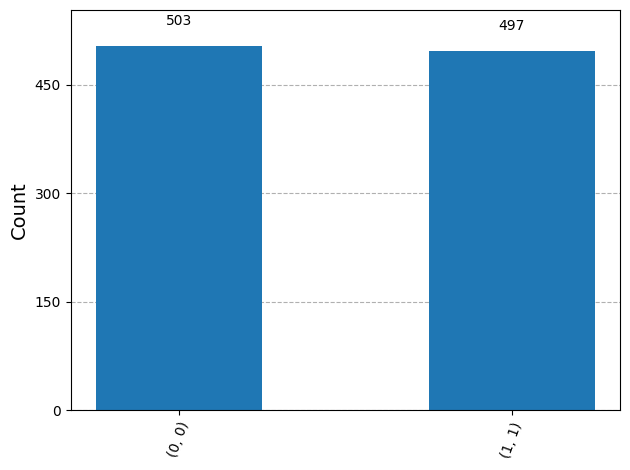

In [12]:
from qiskit.visualization import plot_histogram
handle = backend.process_circuit(ibm_bell, n_shots =1000)
result_counts = backend.get_result(handle).get_counts()
plot_histogram(result_counts)

#### ```pytket-qiskit```でTKET量子回路をIBMの量子デバイス/ノイズモデルエミュレータで計算

IBM Quantum device の情報, IBM Quantum トークンの取得  
https://quantum.ibm.com/

##### IBM Quantum トークンの設定

In [ ]:
# Replace the placeholders with your actual values
ibm_token = '<your_ibm_token_here>'
# If you need a specific instance set it here, otherwise you can omit this line
# inst = '<your_instance_CRN_here>'

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService
# IBM QuantumのAPIキーを設定
QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token=ibm_token, overwrite=True)

#### a. エミュレータまたはIBMの量子コンピュータを選択

In [25]:
from pytket.extensions.qiskit import IBMQBackend, IBMQEmulatorBackend

In [ ]:
#利用可能なデバイスの確認
device = IBMQBackend.available_devices()
[dev.device_name for dev in device]

In [ ]:
#シミュレータを指定したのと全く同じように量子コンピュータを指定
# ibm_backend = AerBackend()
#実機にジョブを投げる
#ibm_backend = IBMQBackend("ibm_aachen")
#実機のノイズを取り出し、ノイズモデルを作成
ibm_backend = IBMQEmulatorBackend("ibm_aachen")

In [ ]:
ibm_backend.backend_info

#### b. 量子コンピュータ、エミュレータが用意しているゲートセットで量子回路を書き替える

In [45]:
#上で指定したデバイスで回路を実行するために回路をコンパイルする。コンパイルされた回路は指定したバックエンドごとに変わります。
#(コンパイル前後の回路を図示して比較してみましょう！)
ibm_bell = ibm_backend.get_compiled_circuit(bell)
render_circuit_jupyter(ibm_bell)
render_circuit_jupyter(bell)

#### c. 量子コンピュータ、エミュレータ上でジョブを実行し、計算結果を取得

In [49]:
#指定したデバイス上で回路を実行
handle = ibm_backend.process_circuit(ibm_bell, n_shots =1000)

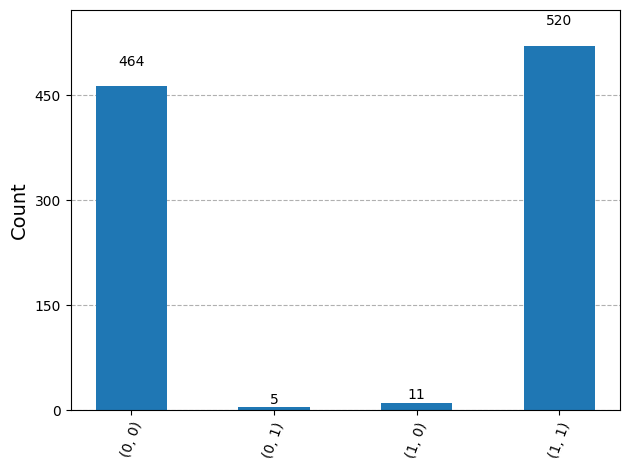

In [50]:
result = ibm_backend.get_result(handle)
counts = result.get_counts()
plot_histogram(counts)

### 2-4. `pytket-qulacs`でTKET 量子回路をQulacsシミュレータで計算

In [53]:
#!pip install -U pytket-qulacs

#### a. Qulacsシミュレータを選択

In [13]:
from pytket.extensions.qulacs import QulacsBackend
qulacs_backend = QulacsBackend()

In [14]:
qulacs_backend.backend_info

BackendInfo(name='QulacsBackend', device_name=None, version='0.41.0', architecture=None, gate_set={OpType.Measure, OpType.Barrier, OpType.Z, OpType.X, OpType.Y, OpType.S, OpType.Sdg, OpType.T, OpType.Tdg, OpType.H, OpType.Rx, OpType.Ry, OpType.Rz, OpType.U3, OpType.U2, OpType.U1, OpType.CX, OpType.CZ, OpType.SWAP}, n_cl_reg=None, supports_fast_feedforward=False, supports_reset=False, supports_midcircuit_measurement=False, all_node_gate_errors=None, all_edge_gate_errors=None, all_readout_errors=None, averaged_node_gate_errors=None, averaged_edge_gate_errors=None, averaged_readout_errors=None, misc={})

#### b. シミュレータが用意しているゲートセットで量子回路を書き替える

In [15]:
qulacs_bell = qulacs_backend.get_compiled_circuit(bell)

#### c. シミュレータでジョブを実行し、計算結果を取得

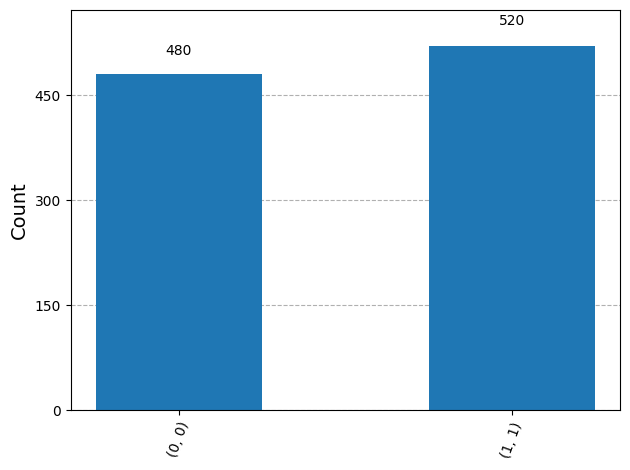

In [16]:
handle = qulacs_backend.process_circuit(bell, n_shots =1000)
result_counts = qulacs_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

#### GPU上でQulacsを利用している場合にも対応している


In [17]:
#from pytket.extensions.qulacs import QulacsGPUBackend
#qualcs_backend = QulacsGPUBackend()
#qulacs_bell = qulacs_backend.get_compiled_circuit(bell)
#handle = qulacs_backend.process_circuit(qulacs_bell, n_shots =1000)
#result_counts = qulacs_backend.get_result(handle).get_counts()
#plot_histogram(result_counts)

詳しくは
https://tket.quantinuum.com/extensions/pytket-qulacs/
を参照ください

### 2-5. `pytket-braket`でTKET 量子回路をBraketシミュレータやAmazon Braket(有料)にある量子デバイスで計算
本講演では詳細は割愛致しますが、Amazon Bracket上でTKETをご利用になられたい方は下記のページを参考に設定をしてください。  
https://tket.quantinuum.com/extensions/pytket-braket/  
または  
米澤(yasuyoshi.yonezawa@quantinuum.com)までご連絡ください。

#### A.ローカル環境からBraketにアクセスされている方は、keyフォルダーのaws-keyのアクセスキー等の情報を入力し下記を実行してください

In [59]:
#!pip install -U pytket-braket

In [ ]:
path = 'key/aws-key'
f = open(path)
aws_access_key_id, aws_secret_access_key, s3_name, bucket_key= [s.strip() for s in f.readlines()]
f.close()

In [ ]:
import boto3
from braket.aws import AwsSession
boto_session = boto3.Session(
    aws_access_key_id= aws_access_key_id,
    aws_secret_access_key= aws_secret_access_key,
    region_name= 'us-east-1'
#    region_name= 'us-west-1'
#    region_name= 'eu-north-1'
)
## us-east-1: IonQ, Simulators
## us-west-1: Rigetti, Simulators
## eu-north-1: IQM, Simulators
##
aws_session = AwsSession(boto_session=boto_session)

In [ ]:
[dev for dev in aws_session.search_devices() if dev["deviceStatus"]!='RETIRED']

#### B. Sagemaker StudioからBraketにアクセスされる方は下記を実行してください。

In [20]:
#!pip install pytket-braket

In [21]:
#import boto3
#from braket.aws import AwsSession
#boto_session = boto3.Session(
#    aws_access_key_id= aws_access_key_id,
#    aws_secret_access_key= aws_secret_access_key,
#    region_name= 'us-east-1'
#    region_name= 'us-west-1'
#    region_name= 'eu-north-1'
#)
# us-east-1: IonQ, Simulators
# us-west-1: Rigetti, Simulators
# eu-north-1: IQM
#
#aws_session = AwsSession(boto_session=boto_session)

In [22]:
#[dev for dev in aws_session.search_devices() if dev["deviceStatus"]!='RETIRED']

#### a. エミュレータまたはBraket上の量子コンピュータを選択

In [23]:
# backend の選択
from pytket.extensions.braket import BraketBackend

# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1, region: us-east-1
# aws_backend = BraketBackend(device='Aria-1',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)
# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Forte-1, region: us-east-1
# aws_backend = BraketBackend(device='Forte-1',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)
# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Forte-Enterprise-1, region: us-east-1
# aws_backend = BraketBackend(device='Forte-Enterprise-1',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)

# Rigetti   arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3 #Ankaa-3, region: us-west-1
# aws_backend = BraketBackend(device='Ankaa-3',region = 'us-west-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'rigetti', aws_session=aws_session)

# IQM Garnet arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet
# aws_backend = BraketBackend(device='Garnet',region = 'eu-north-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'iqm', aws_session=aws_session)
# IQM Emerald arn:aws:braket:eu-north-1::device/qpu/iqm/Emerald
# aws_backend = BraketBackend(device='Emerald',region = 'eu-north-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'iqm', aws_session=aws_session)

# SV1    sim_arn = 'arn:aws:braket:::device/quantum-simulator/amazon/sv1'     #SV1, region:
# aws_backend = BraketBackend(device='sv1', s3_bucket=s3_name , s3_folder = bucket_key, aws_session=aws_session)
# TN1   sim_arn = 'arn:aws:braket:::device/quantum-simulator/amazon/tn1'    #TN1, region: us-west-2, us-east-1
# aws_backend = BraketBackend(device='tn1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'quantum-simulator', provider = 'amazon', aws_session=aws_session)
# DM1   sim_arn = 'arn:aws:braket:::device/quantum-simulator/amazon/dm1'    #DM1, region: 
# aws_backend = BraketBackend(device='dm1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'quantum-simulator', provider = 'amazon', aws_session=aws_session)
# Local sv1 simulator
aws_backend = BraketBackend(local = True)

In [24]:
aws_backend.backend_info

BackendInfo(name='BraketBackend', device_name='sv1', version='0.45.0', architecture=<tket::FullyConnected, nodes=26>, gate_set={OpType.noop, OpType.ECR, OpType.ISWAP, OpType.XXPhase, OpType.YYPhase, OpType.ZZPhase, OpType.ISWAPMax, OpType.Z, OpType.X, OpType.Y, OpType.S, OpType.Sdg, OpType.T, OpType.Tdg, OpType.V, OpType.Vdg, OpType.H, OpType.Rx, OpType.Ry, OpType.Rz, OpType.U1, OpType.CX, OpType.CY, OpType.CZ, OpType.CV, OpType.CU1, OpType.CCX, OpType.SWAP, OpType.CSWAP}, n_cl_reg=None, supports_fast_feedforward=False, supports_reset=False, supports_midcircuit_measurement=False, all_node_gate_errors=None, all_edge_gate_errors=None, all_readout_errors=None, averaged_node_gate_errors=None, averaged_edge_gate_errors=None, averaged_readout_errors=None, misc={})

#### b. 量子コンピュータ、エミュレータが用意しているゲートセットで量子回路を書き替える

In [25]:
aws_bell = aws_backend.get_compiled_circuit(bell)
render_circuit_jupyter(aws_bell)

#### c. 量子コンピュータ、エミュレータにジョブを実行し、計算結果を取得

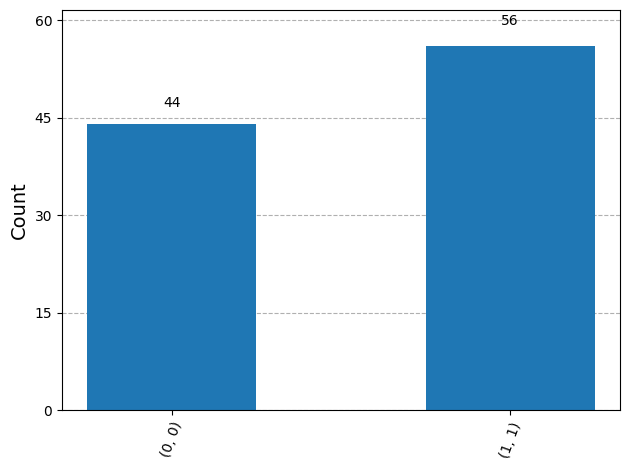

In [26]:
aws_handle = aws_backend.process_circuit(aws_bell, n_shots =100)
aws_result = aws_backend.get_result(aws_handle)
plot_histogram(aws_result.get_counts())

## 3. 量子回路の最適化
量子計算時に生じるデバイスエラーの影響を最小化。  
デバイス非依存の最適化とデバイス依存の最適化（実はすでに上記で利用）がある。  

### 3-1. `PauliSquash` 関数を利用した、量子回路の最適化
TKETには量子回路を最適化する様々な機能が用意されている。
ここで`PauliSquash` 関数を利用した回路の最適化（デバイス非依存）を行う。
`PauliSquash` 関数：Pauli ゲートとCliffordゲートで表現された量子回路を出力）

ランダムな量子回路を作成し、回路の深さとCXの深さを数える。

In [27]:
from pytket.pauli import Pauli
from pytket.circuit import PauliExpBox, fresh_symbol, OpType
from pytket.passes import DecomposeBoxes
box = PauliExpBox([Pauli.I, Pauli.Z, Pauli.X, Pauli.Y], fresh_symbol('tm'))
from pytket.utils import Graph
import numpy as np

def get_random_pauli_gadgets(n_qubits, n_pauli_gadgets, max_entangle):
    """ """
    paulis = [Pauli.I, Pauli.X, Pauli.Y, Pauli.Z]
    circ = Circuit(n_qubits)
    for i in range(n_pauli_gadgets):
        ls_paulis = [np.random.choice(paulis) for k in range(max_entangle)]
        if ls_paulis.count(Pauli.Y) % 2 == 0:
            continue
        if len(ls_paulis) - ls_paulis.count(Pauli.I) <= 1:
            continue
        qubits = np.random.choice(
            [i for i in range(n_qubits)], size=max_entangle, replace=False
        )
        box = PauliExpBox(ls_paulis, fresh_symbol('a'))
        circ.add_pauliexpbox(box, sorted(qubits))
    DecomposeBoxes().apply(circ)
    return circ

ランダムな量子ゲート（Pauliガジェット）を含んだ量子回路を作成

In [28]:
circ = get_random_pauli_gadgets(
    n_qubits=8, n_pauli_gadgets=200, max_entangle=4
)
print('Circuit depth: ', circ.depth())
print('CX depth: ', circ.depth_by_type(OpType.CX))
render_circuit_jupyter(circ)

Circuit depth:  419
CX depth:  245


`PauliSquash` 関数を使って、量子回路の最適化

In [29]:
# Circuit optimization by using compiler passes.
from pytket.passes import PauliSquash
circx = circ.copy()
PauliSquash().apply(circx)
#FullPeepholeOptimise().apply(circx)
print('Circuit depth: ', circx.depth())
print('CX depth: ', circx.depth_by_type(OpType.CX))
render_circuit_jupyter(circx)

Circuit depth:  373
CX depth:  241


## 4. 量子回路の変換
pytketでは
- qiskitで記述した量子回路(`qiskit.QuantumCircuit`)からTKETの量子回路のクラスに変換が可能
- TKETで記述した量子回路からqiskitの量子回路(`qiskit.QuantumCircuit`)のクラスに変換が可能
- TKETで記述した量子回路と他の量子プログラミング言語(一部)での量子回路の交換が可能

参照：[pytket-extensions](https://tket.quantinuum.com/api-docs/extensions.html) 

### 4-1. `qiskit`の量子回路から`TKET`の量子回路に変換

In [30]:
from qiskit import QuantumCircuit

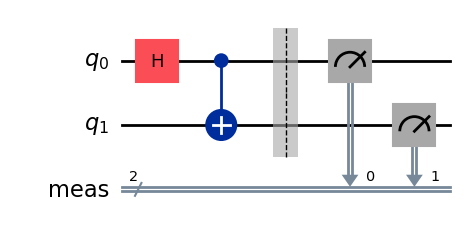

In [31]:
q_bell = QuantumCircuit(2)
q_bell.h(0)
q_bell.cx(0,1)
q_bell.measure_all()
q_bell.draw('mpl')

In [32]:
from pytket.extensions.qiskit import qiskit_to_tk

In [33]:
bell2 = qiskit_to_tk(q_bell)
bell2

[H q[0]; CX q[0], q[1]; Barrier q[0], q[1]; Measure q[0] --> meas[0]; Measure q[1] --> meas[1]; ]

In [34]:
render_circuit_jupyter(bell2)

### 4-2. `TKET`の量子回路から`qiskit`の量子回路に変換

In [35]:
from pytket.extensions.qiskit import tk_to_qiskit

In [36]:
q_bell2 = tk_to_qiskit(bell)
q_bell2

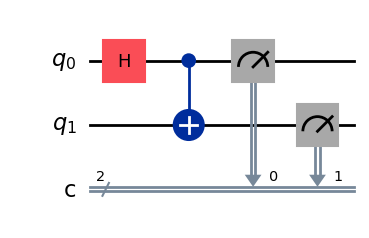

In [37]:
q_bell2.draw('mpl')

## 文献等

弊社Quantinuumのご紹介
- Quantinuum ウェブサイト（ 英語 ）： https://www.quantinuum.com/
- Quantinuum K.K. ウェブサイト（ 日本語 ）： https://quantinuum.co.jp/
- ニュース（ 日本語 ）： https://quantinuum.co.jp/news/  
- X（ 日本語 ）： https://x.com/quantinuum_jp?lang=en
- Quantinuum K.K.主催の勉強会（ 日本語 ）： https://quantinuum.connpass.com/  
- 採用情報：https://jobs.eu.lever.co/quantinuum?location=Japan%20Tokyo
- TKET slack channel：[TKET slack channel](https://join.slack.com/t/tketusers/shared_invite/zt-2aoan2s87-WDdZQeY2dbJQgAQE6O~3qg)

<img src="./fig/slack-qr.png" width="250">
